In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
max_length_dict = {'mnist-f': 800,
                   'mnist-o': 600,
                   'femnist': 2000,
                   'celeba': 200}

algo_color = {'cgd': 'black',
              'fedavg': '#4BACC6',
              'hier-favg': '#1F497D',
              'fedavg-i': '#F79646',
              'fedavg-c': '#9BBB59',
              'fedavg-ic': '#C0504D'}

algo_line = {'cgd': '-',
             'fedavg': '-',
             'hier-favg': '-',
             'fedavg-i': '--',
             'fedavg-c': '--',
             'fedavg-ic': '-'}

basic_linewidth = 1.5
algo_linewidth = {'cgd': basic_linewidth,
                  'fedavg': basic_linewidth,
                  'hier-favg': basic_linewidth,
                  'fedavg-i': basic_linewidth/2,
                  'fedavg-c': basic_linewidth/2,
                  'fedavg-ic': basic_linewidth}

In [3]:
def search_files(dirname, full_name):
    filenames = os.listdir(dirname)
    file_list = []
    for filename in filenames:
        if full_name in filename:
            file_list.append(filename)
    return file_list

def plot_one_result(iid, style, ax, setlist, most_left=False, iid_left=False, order=None, multiply=1, x_epoch=False):
    ax.grid(color='black', linestyle='-', linewidth=0.5, axis='y', alpha=0.5)
    
    if style == 'fig1':
        dirname = os.getcwd() + '/log/fig1'
        plot_one_line(ax, dirname=dirname, model=setlist[0], data=setlist[1], algorithm='fedavg', node_edge='th')
        plot_one_line(ax, dirname=dirname, model=setlist[0], data=setlist[1], algorithm='hier-favg', node_edge='tt')
        plot_one_line(ax, dirname=dirname, model=setlist[0], data=setlist[1], algorithm='fedavg-i', node_edge='tt')
        plot_one_line(ax, dirname=dirname, model=setlist[0], data=setlist[1], algorithm='fedavg-c', node_edge='tt')
        plot_one_line(ax, dirname=dirname, model=setlist[0], data=setlist[1], algorithm='fedavg-ic', node_edge='tt')
        
        if order==1:
            ymin = 0.65
            ymax = 0.95
            ax.set_ylim([ymin, ymax])
            ax.set_yticks(np.arange(ymin, ymax+1e-5, 0.1))
        elif order==2:
            ymin = 0.5
            ymax = 0.8
            ax.set_ylim([ymin, ymax])
            ax.set_yticks(np.arange(ymin, ymax+1e-5, 0.1))
        elif order==3:
            ymin = 0.45
            ymax = 0.75
            ax.set_ylim([ymin, ymax])
            ax.set_yticks(np.arange(ymin, ymax+1e-5, 0.1))
        elif order==4:
            ymin = 0.45
            ymax = 0.75
            ax.set_ylim([ymin, ymax])
            ax.set_yticks(np.arange(ymin, ymax+1e-5, 0.1))
        
    elif style == 'fig2':
        dirname = os.getcwd() + '/log/fig2'
        if setlist in ['tt', 'tq', 'th']:
            fedavg_setlist = 'th'
        elif setlist in ['qq', 'qh']:
            fedavg_setlist = 'qh'
        else:
            fedavg_setlist = 'hh'
        plot_one_line(ax, dirname=dirname, model='cnn-mnist', data='mnist-o', algorithm='fedavg', node_edge=fedavg_setlist, multiply=multiply)
        plot_one_line(ax, dirname=dirname, model='cnn-mnist', data='mnist-o', algorithm='hier-favg', node_edge=setlist, multiply=multiply)
        plot_one_line(ax, dirname=dirname, model='cnn-mnist', data='mnist-o', algorithm='fedavg-i', node_edge=setlist, multiply=multiply)
        plot_one_line(ax, dirname=dirname, model='cnn-mnist', data='mnist-o', algorithm='fedavg-c', node_edge=setlist, multiply=multiply)
        plot_one_line(ax, dirname=dirname, model='cnn-mnist', data='mnist-o', algorithm='fedavg-ic', node_edge=setlist, multiply=multiply)
        
        if iid:
            ymin = 0.92
            ymax = 0.98
            ax.set_ylim([ymin, ymax])
            ax.set_yticks(np.arange(ymin, ymax+1e-5, 0.02))
        else:
            ymin = 0.65
            ymax = 0.95
            ax.set_ylim([ymin, ymax])
            ax.set_yticks(np.arange(ymin, ymax+1e-5, 0.1))

    ax.set_xlabel('Elapsed time(sec)', fontsize=16)
    
    if most_left:
        ax.set_ylabel('Accuracy', fontsize=16)
    
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.tick_params(axis='both', which='minor', labelsize=14)
        
def plot_one_line(ax, dirname, model, data, algorithm, node_edge, multiply=1, x_epoch=False):
    max_length = int(max_length_dict[data] * multiply)
    if node_edge is None:
        full_name = model + '_' + data + '_' + algorithm
    else:
        full_name = model + '_' + data + '_' + algorithm + '_' + node_edge
    file_list = search_files(dirname, full_name)
    
    if x_epoch:
        file_list = [f for f in file_list if 'epoch' in f]
    else:
        file_list = [f for f in file_list if 'epoch' not in f]
        
    if len(file_list) == 1:
        time = np.arange(0, max_length/2, 0.5)
        accuracy = np.array(pd.read_csv(dirname+'/'+file_list[0])['accuracy'])
        if not x_epoch:
            accuracy = accuracy[:max_length]
        ax.plot(time, accuracy, label=algorithm, color=algo_color[algorithm], linestyle=algo_line[algorithm], linewidth=algo_linewidth[algorithm])
    else:
        time = np.arange(0, max_length/2, 0.5)
        accuracy_list = []
        for i in range(len(file_list)):
            accuracy = pd.read_csv(dirname+'/'+file_list[i])['accuracy']
            accuracy = accuracy[:max_length]
            accuracy_list += [accuracy]
        accuracy_mean = np.mean(accuracy_list, axis=0)
        accuracy_std = np.std(accuracy_list, axis=0)
        
        ax.plot(time, accuracy_mean, label=algorithm, color=algo_color[algorithm], linestyle=algo_line[algorithm], linewidth=algo_linewidth[algorithm])
        ax.fill_between(time, accuracy_mean-accuracy_std, accuracy_mean+accuracy_std, alpha=0.3, facecolor=algo_color[algorithm])

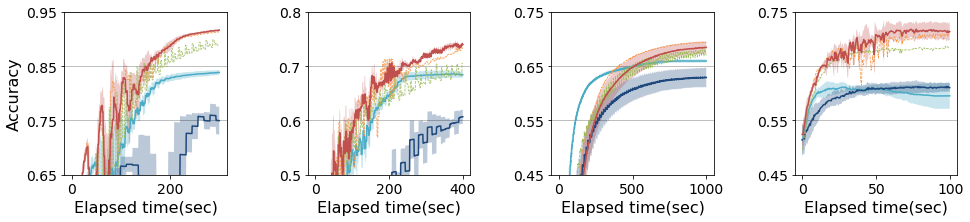

In [4]:
# various_dtt.pdf
fig, axes = plt.subplots(1, 4, sharey=False, figsize=(16, 3))
setlist = [('cnn-mnist', 'mnist-o'), ('cnn-mnist', 'mnist-f'), ('cnn-mnist', 'femnist'), ('cnn-celeba', 'celeba')]

plot_one_result(iid=False, style='fig1', ax=axes[0], setlist=setlist[0], most_left=True, order=1)
plot_one_result(iid=False, style='fig1', ax=axes[1], setlist=setlist[1], most_left=False, order=2)
plot_one_result(iid=False, style='fig1', ax=axes[2], setlist=setlist[2], most_left=False, order=3)
plot_one_result(iid=False, style='fig1', ax=axes[3], setlist=setlist[3], most_left=False, order=4)

plt.subplots_adjust(wspace=0.5)
plt.show()
# plt.savefig('various_dtt.pdf', bbox_inches='tight', format='pdf')
plt.close()

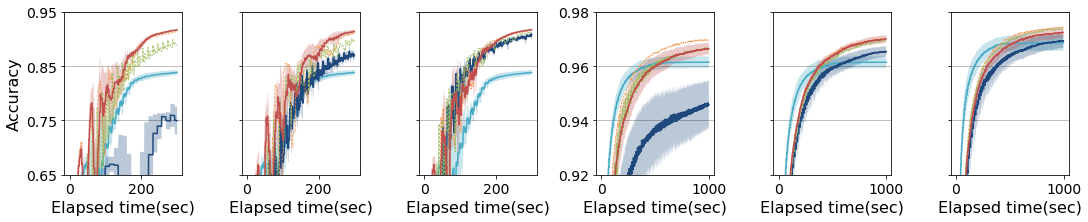

In [5]:
# dtt_to_dhh.pdf
fig, axes = plt.subplots(1, 6, sharey=False, figsize=(18, 3))
setlist = ['tt', 'tq', 'th', 'qq', 'qh', 'hh']

plot_one_result(iid=False, style='fig2', ax=axes[0], setlist=setlist[0], most_left=True, iid_left=False, multiply=1)
plot_one_result(iid=False, style='fig2', ax=axes[1], setlist=setlist[1], most_left=False, iid_left=False, multiply=1)
plot_one_result(iid=False, style='fig2', ax=axes[2], setlist=setlist[2], most_left=False, iid_left=False, multiply=1)
plot_one_result(iid=True, style='fig2', ax=axes[3], setlist=setlist[3], most_left=False, iid_left=True, multiply=3.33)
plot_one_result(iid=True, style='fig2', ax=axes[4], setlist=setlist[4], most_left=False, iid_left=False, multiply=3.33)
plot_one_result(iid=True, style='fig2', ax=axes[5], setlist=setlist[5], most_left=False, iid_left=False, multiply=3.33)

plt.setp(axes[1].get_yticklabels(), visible=False)
plt.setp(axes[2].get_yticklabels(), visible=False)
plt.setp(axes[4].get_yticklabels(), visible=False)
plt.setp(axes[5].get_yticklabels(), visible=False)

plt.subplots_adjust(wspace=0.5)
plt.show()
# plt.savefig('dtt_to_dhh.pdf', bbox_inches='tight', format='pdf')
plt.close()